<a href="https://colab.research.google.com/github/AjayKankipati/Heart-Disease-Research/blob/main/Heart_Disease_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')
print(len(df))


Mounted at /content/drive
253680


In [ ]:
#checking for null values
print(df.isna().sum().sum())

0


In [ ]:
#print first five values
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


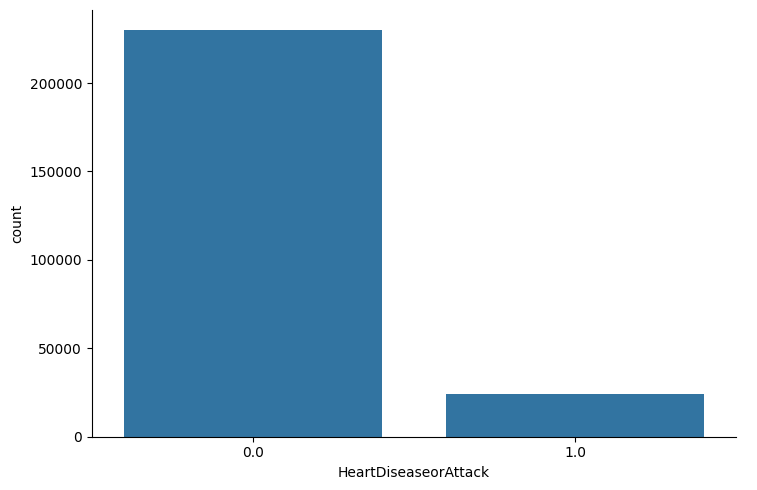

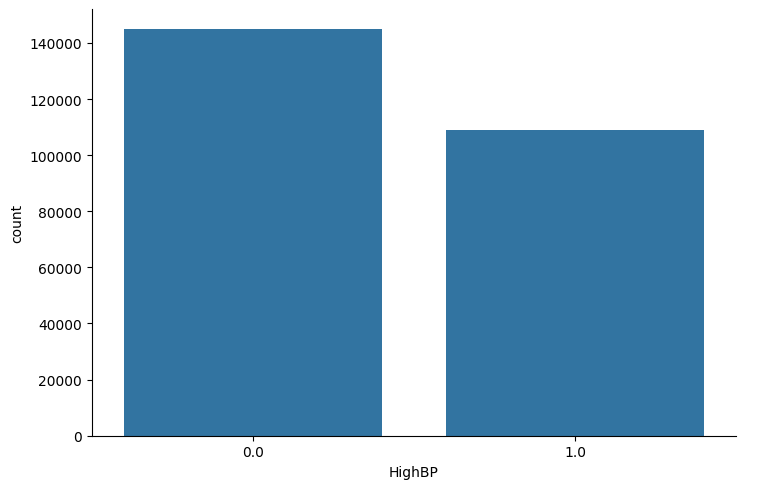

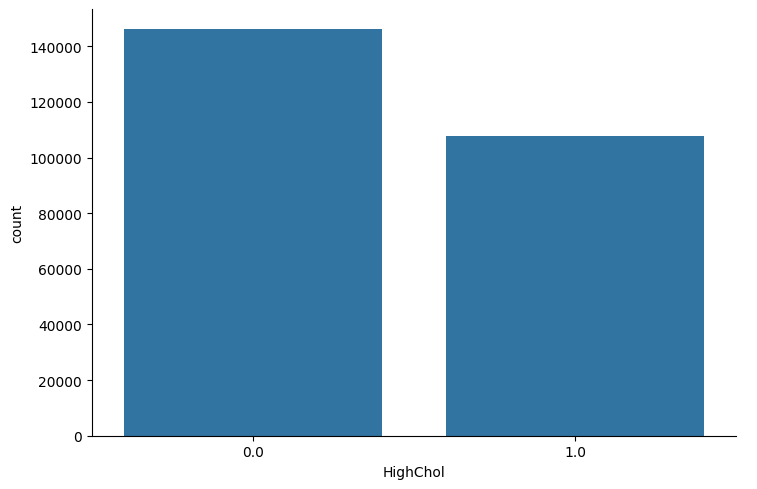

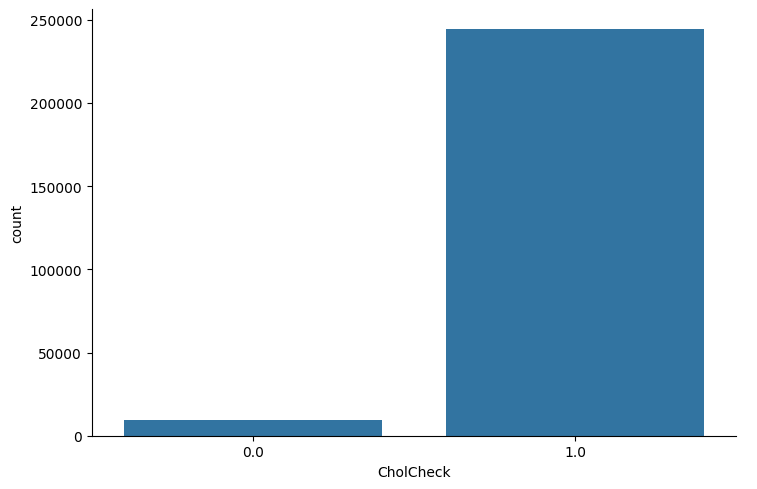

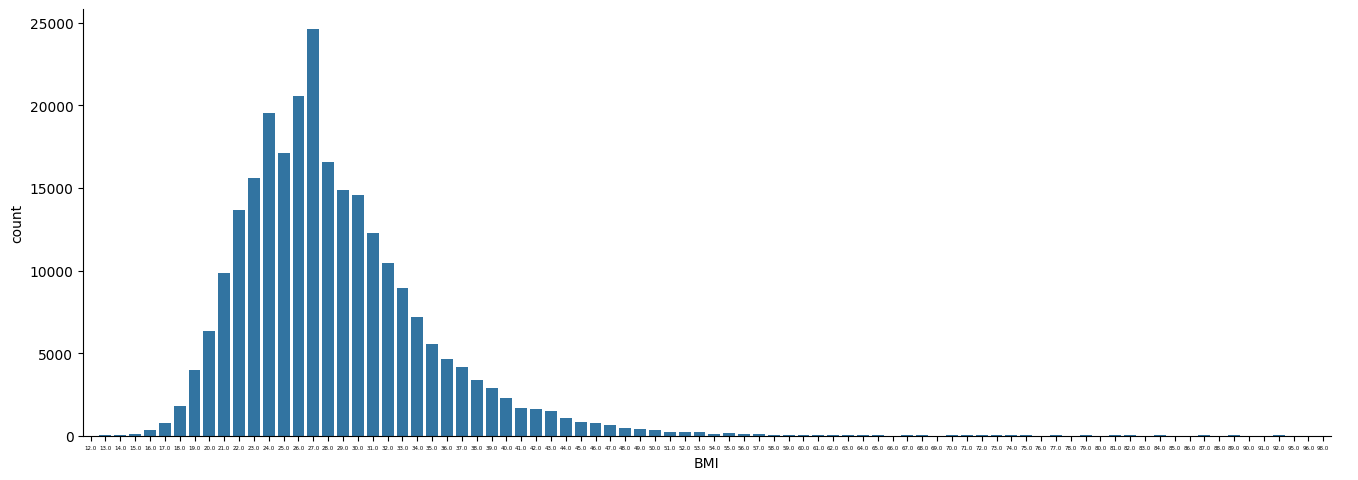

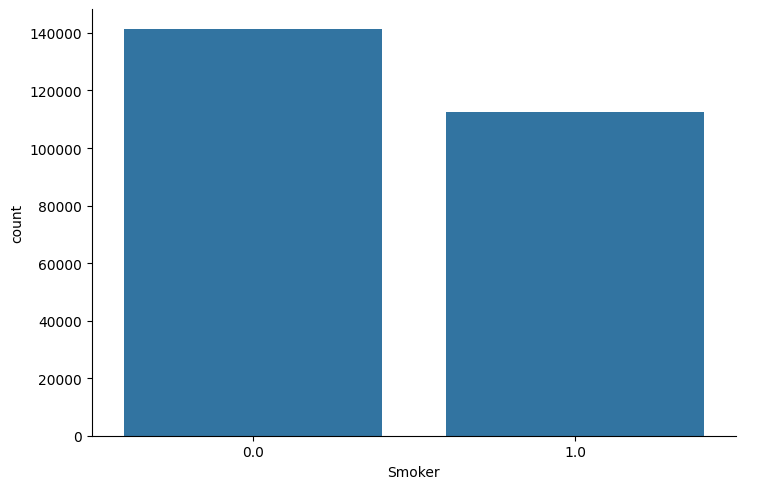

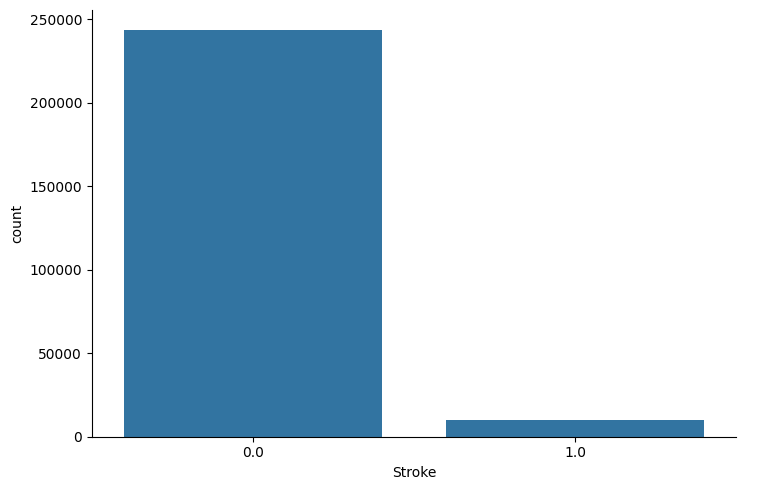

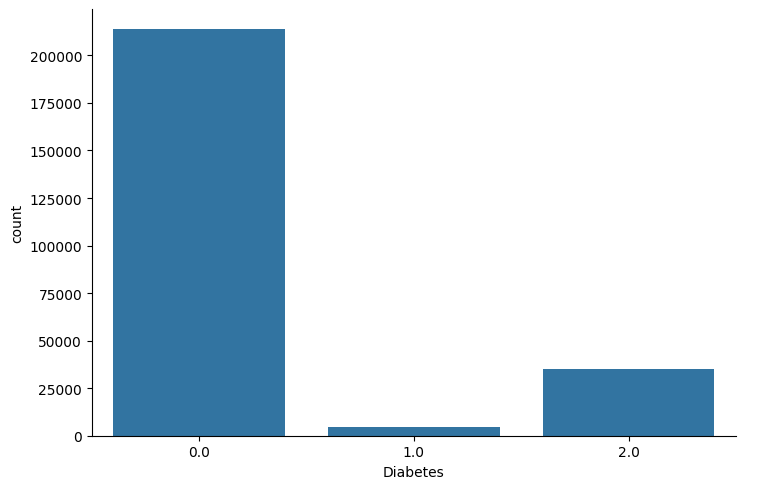

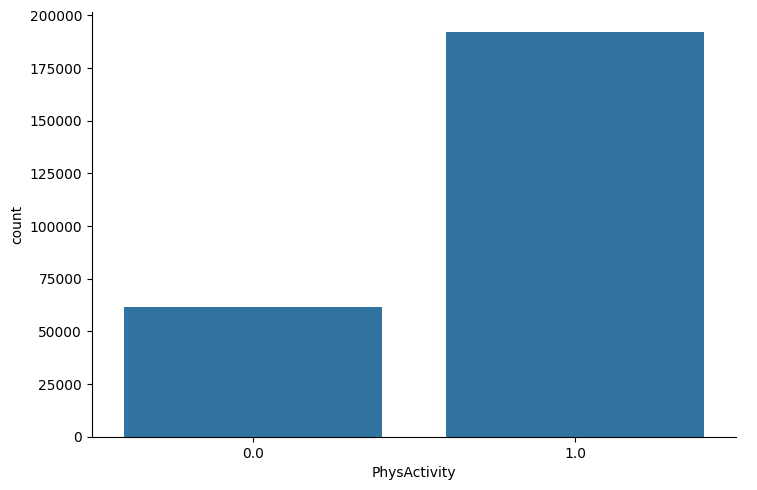

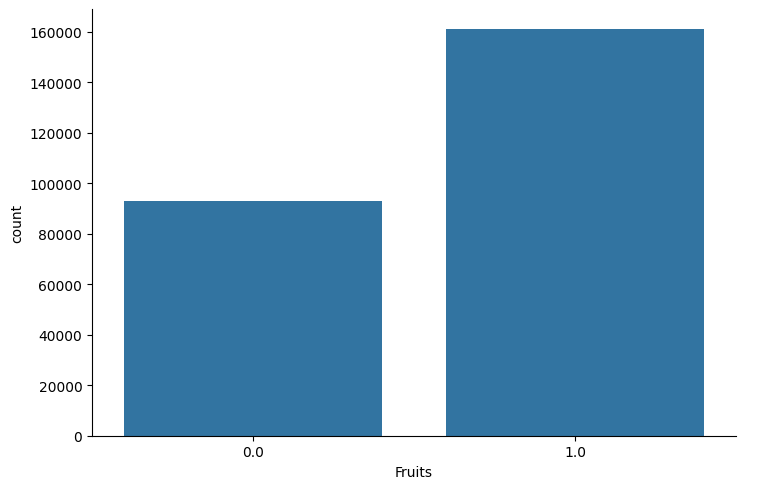

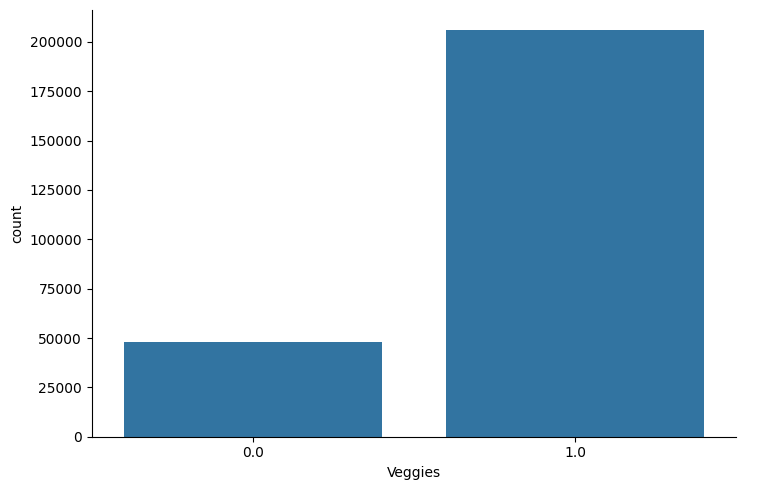

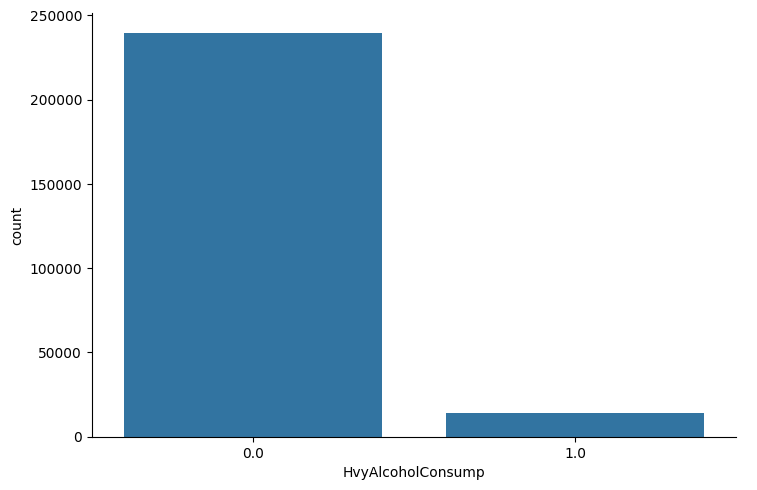

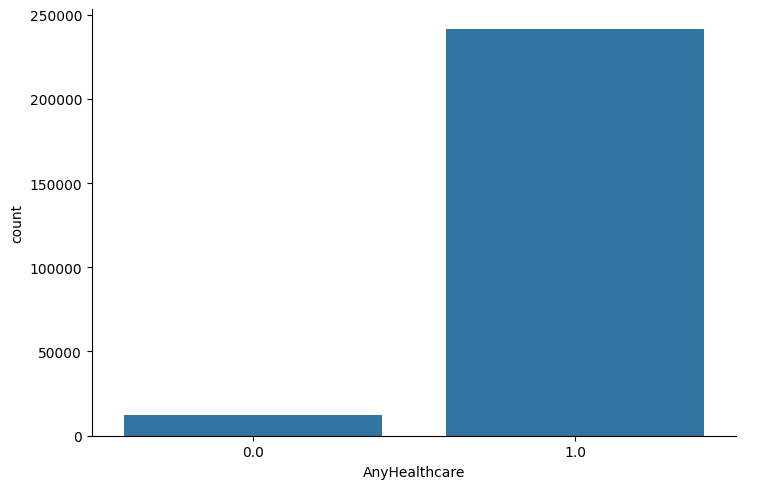

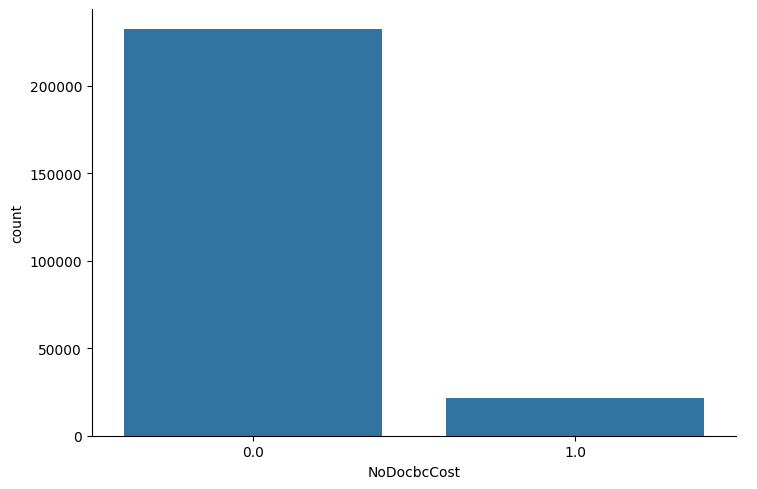

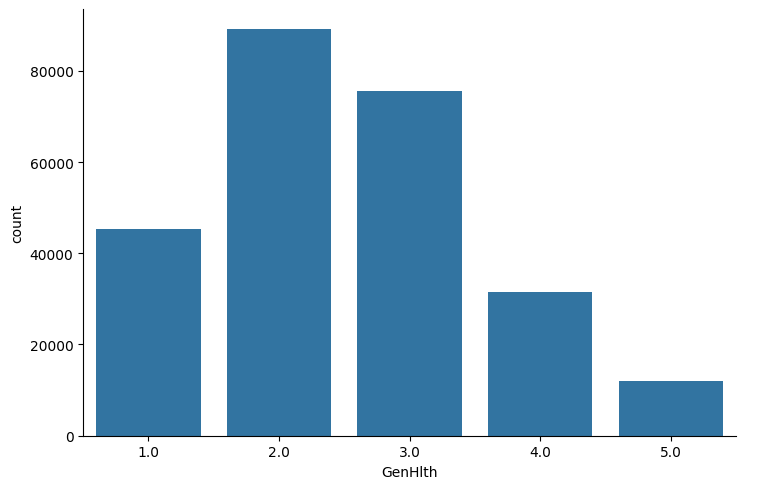

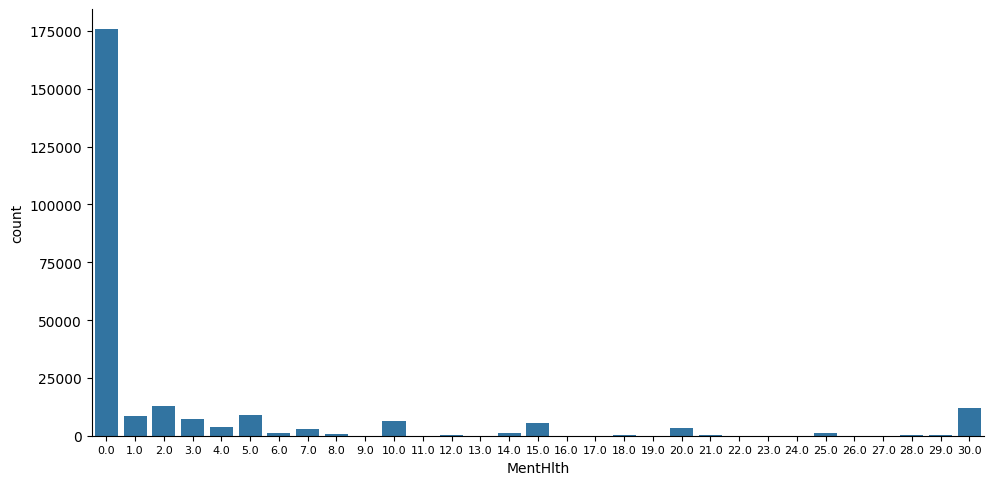

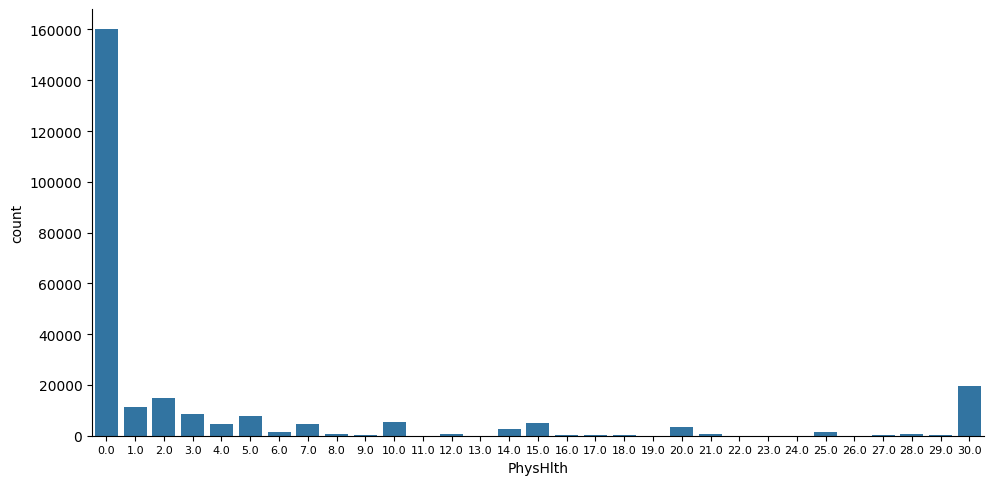

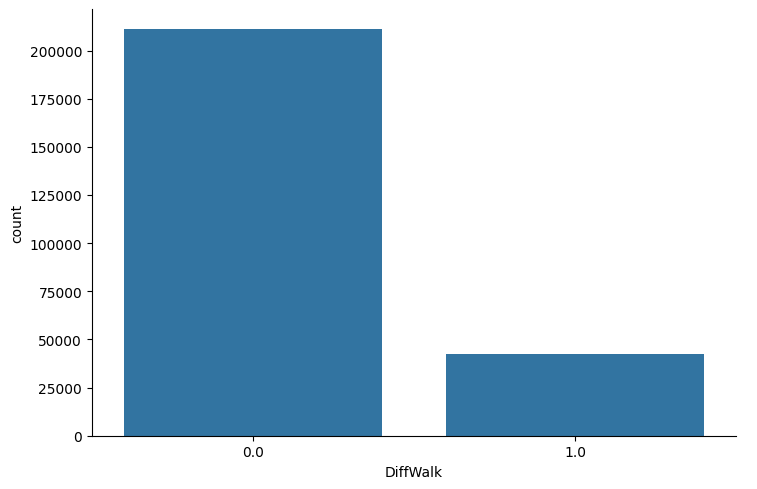

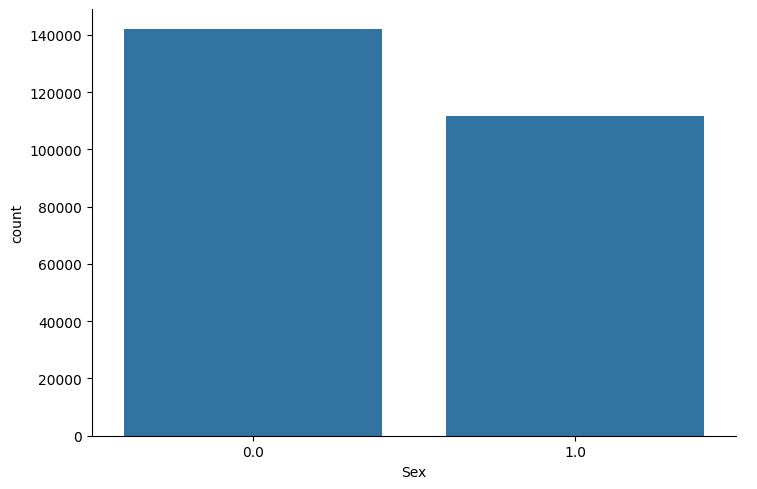

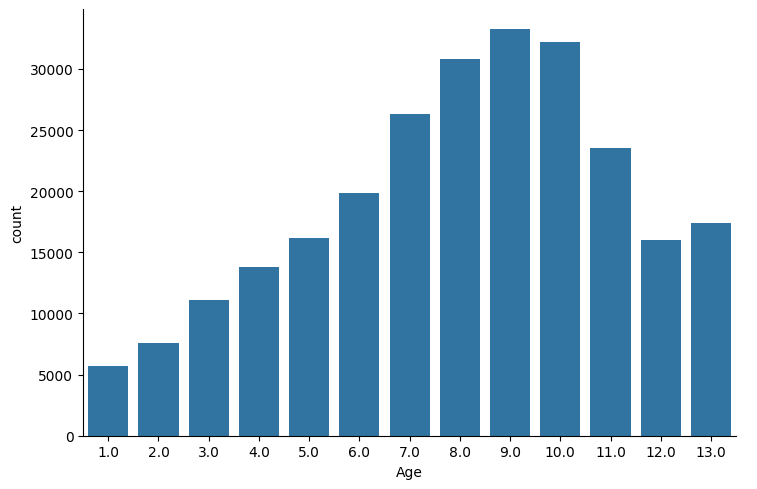

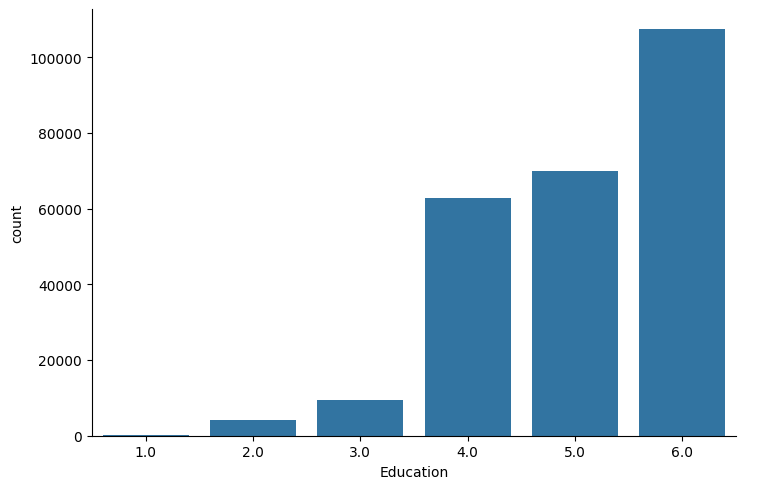

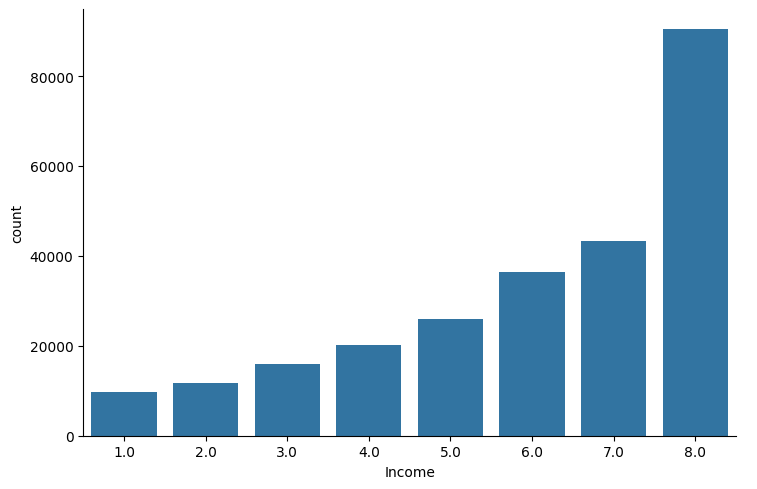

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

#Looped through all 21 features and added catplots for each
# Loop through all 21 features and add catplots for each
for column in df.columns:
    if column == 'BMI':
        plot = sns.catplot(x=column, kind='count', data=df, aspect=2.7)
        plot.set_xticklabels(fontsize=4)  # Set x-axis label font size to 4 for the 'BMI' column
    elif column == 'MentHlth' or column == 'PhysHlth':
        plot = sns.catplot(x=column, kind='count', data=df, aspect=2)
        plot.set_xticklabels(fontsize=8)
    else:
        sns.catplot(x=column, kind='count', data=df, aspect=1.5)  # Use the default font size for other columns

    plt.show()
    print("\n")  # Add a newline after each plot




# To upload files from Your Computer's File System:


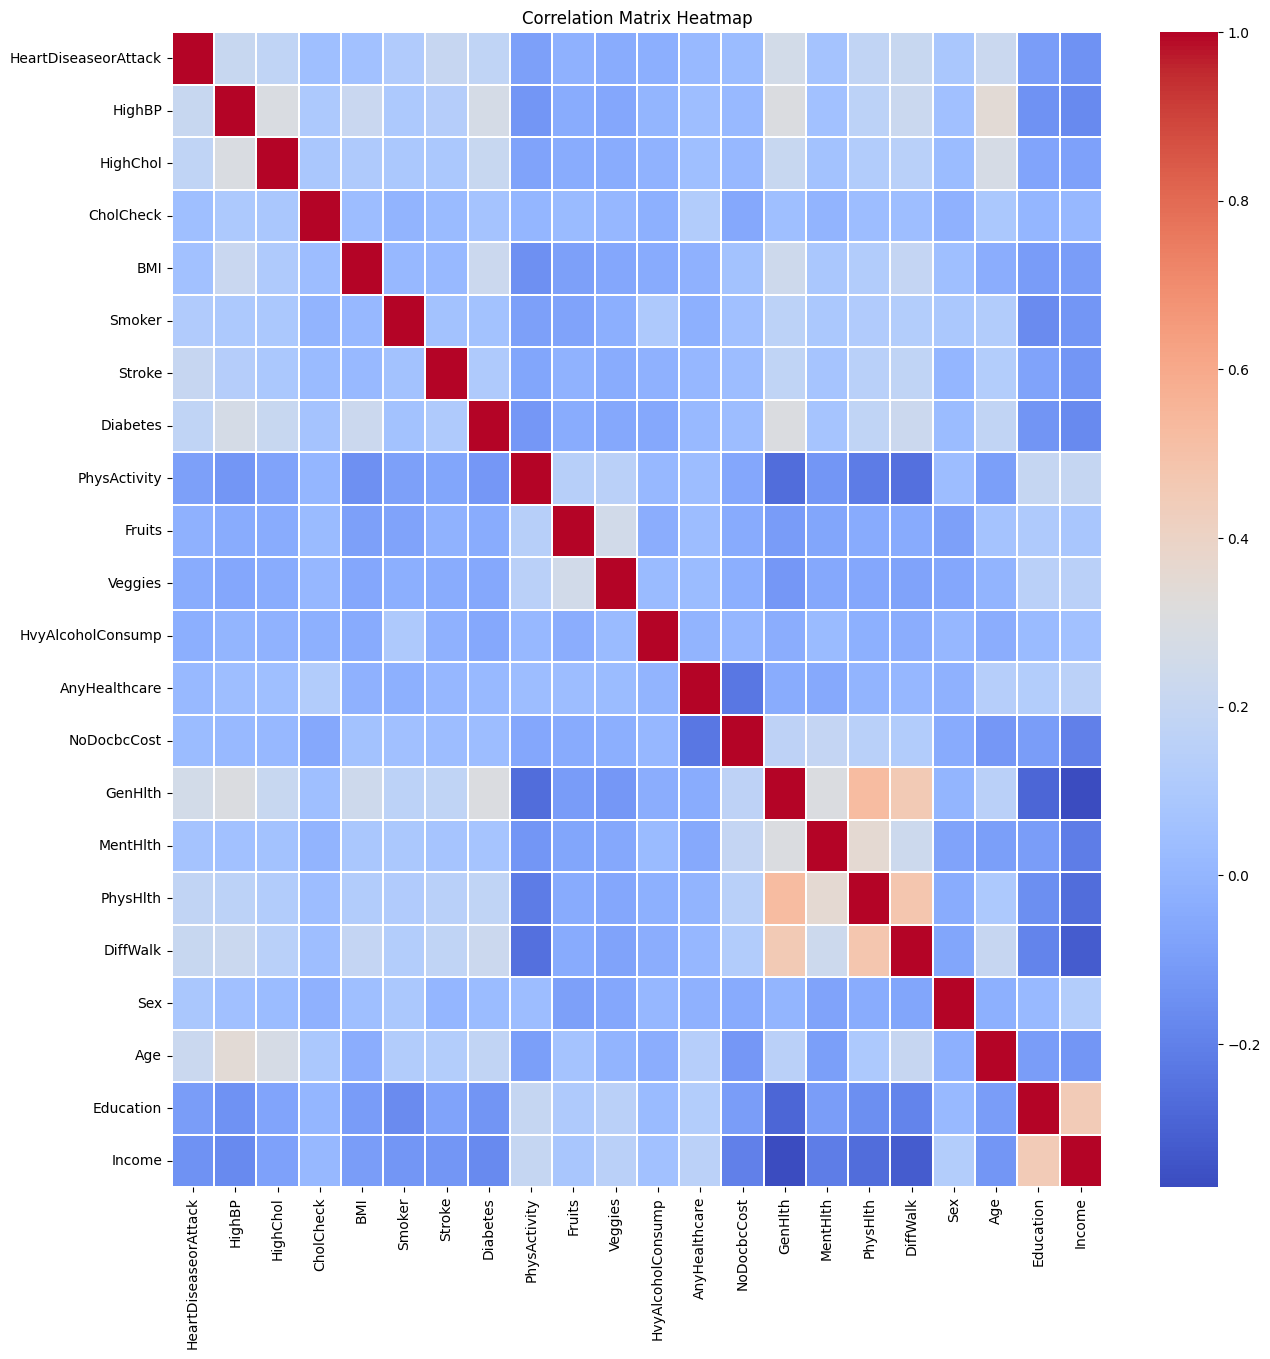

In [ ]:
# Create Correlation Matrix Heatmap of all attributes in the dataset
correlation_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()

#negative correlation(darker blue) -->


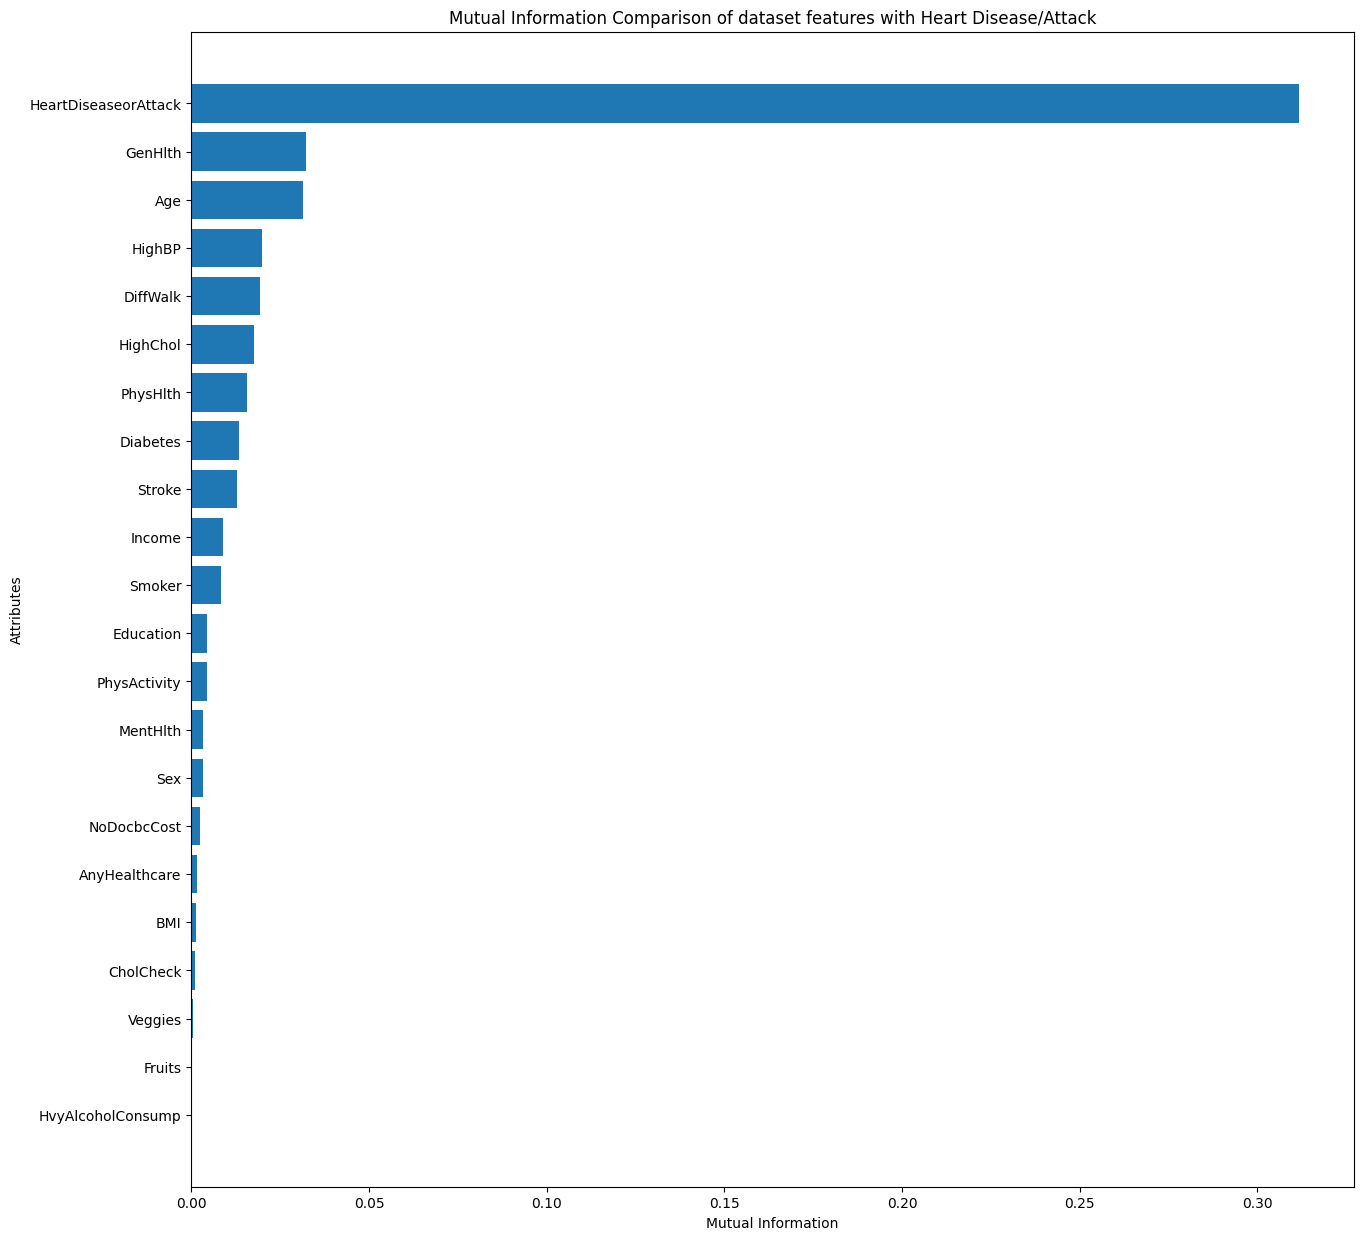

In [ ]:
#Mutual Information Comparison of dataset features with Target Variable: (Heart Disease/Attack) --> might not be that useful
from sklearn.feature_selection import mutual_info_regression

target_column = 'HeartDiseaseorAttack'
data = df.copy()

# Convert categorical variables to numerical if needed (e.g., using one-hot encoding)

# Step 2: Compute Mutual Information
mutual_info = {}
for column in data.columns:
    mi = mutual_info_regression(data[[column]], data[target_column])
    mutual_info[column] = mi[0]

# Step 3: Create the Horizontal Bar Plot (Lowest to Highest)
plt.figure(figsize=(15, 15))
sorted_mutual_info = {k: v for k, v in sorted(mutual_info.items(), key=lambda item: item[1])}  # Sort in ascending order
attributes = list(sorted_mutual_info.keys())
mi_values = list(sorted_mutual_info.values())

#remove HeartDiseaseorAttack from the dataset before making the graph
#do more research on Mutual Information comparison

plt.barh(attributes, mi_values)
plt.xlabel('Mutual Information')
plt.ylabel('Attributes')
plt.title('Mutual Information Comparison of dataset features with Heart Disease/Attack')
plt.show()

#undersample data








In [ ]:
#undersmaple data
from sklearn.utils import resample


# Separate the majority and minority classes
majority_class = df[df['HeartDiseaseorAttack'] == 0]  # Assuming 0 represents majority class
minority_class = df[df['HeartDiseaseorAttack'] == 1]  # Assuming 1 represents minority class

# Determine the number of samples to keep from the majority class
desired_majority_size = len(minority_class)
print(desired_majority_size)
print(len(majority_class))

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=desired_majority_size,
                                 random_state=42)

# Combine the minority class and the undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])



23893
229787


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[3542 1198]
 [1063 3755]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      4740
         1.0       0.76      0.78      0.77      4818

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558



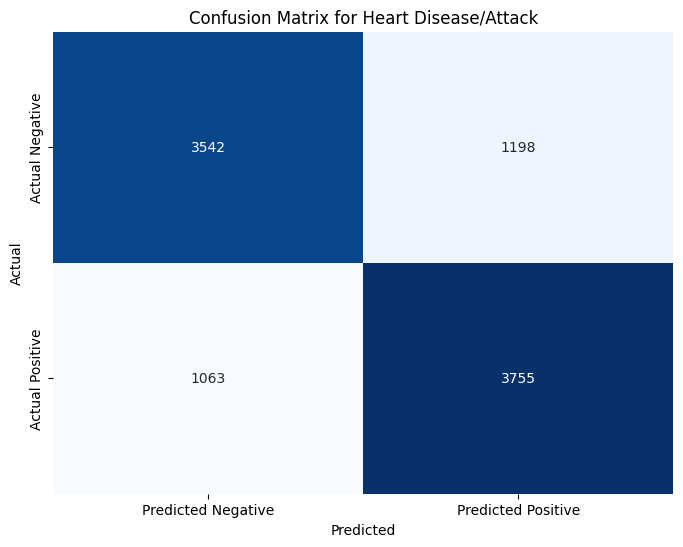

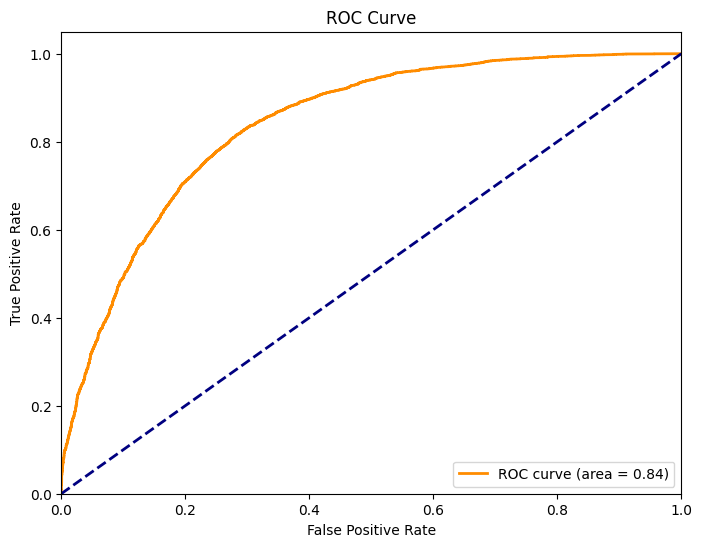

NameError: name 'average_precision_score' is not defined

In [ ]:
#logistic regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve



# Assuming 'HeartAttackorDisease' is your target variable
X = undersampled_df.drop(columns=['HeartDiseaseorAttack'])
y = undersampled_df['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)



# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for labeling
confusion_df = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'],
                            index=['Actual Negative', 'Actual Positive'])

# Display the confusion matrix as a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Heart Disease/Attack')
plt.show()

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)


# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


"""
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
"""



"""
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the number of samples in each class
num_samples_in_class_0 = (y_train == 0).sum()
num_samples_in_class_1 = (y_train == 1).sum()

# Calculate the total number of samples and the number of classes
total_samples = len(y_train)
#print(total_samples)
num_classes = len(y_train.unique())
#print(num_classes)
# Calculate custom class weights

weight_for_class_0 = total_samples / (num_samples_in_class_0 * num_classes)
weight_for_class_1 = total_samples / (num_samples_in_class_1 * num_classes)


#class_weight={0: weight_for_class_0, 1: weight_for_class_1}

# Initialize the logistic regression model with the custom class weights
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for labeling
confusion_df = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'],
                            index=['Actual Negative', 'Actual Positive'])

# Display the confusion matrix as a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for HeartDiseaseorAttack')
plt.show()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_rep)

y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate ROC AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.grid(True)
plt.show()
"""

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

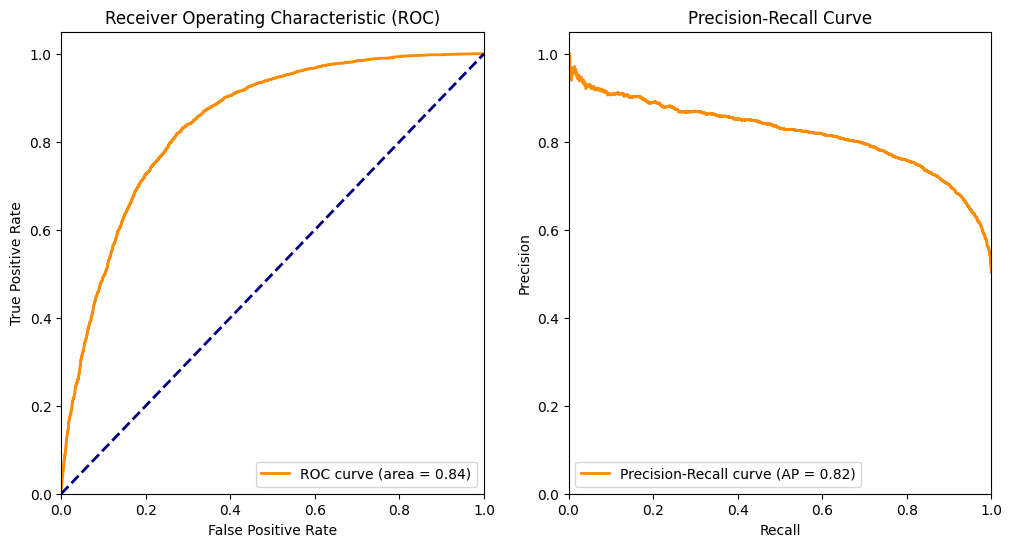

Confusion Matrix:
[[3466 1274]
 [ 906 3912]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4740
         1.0       0.75      0.81      0.78      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



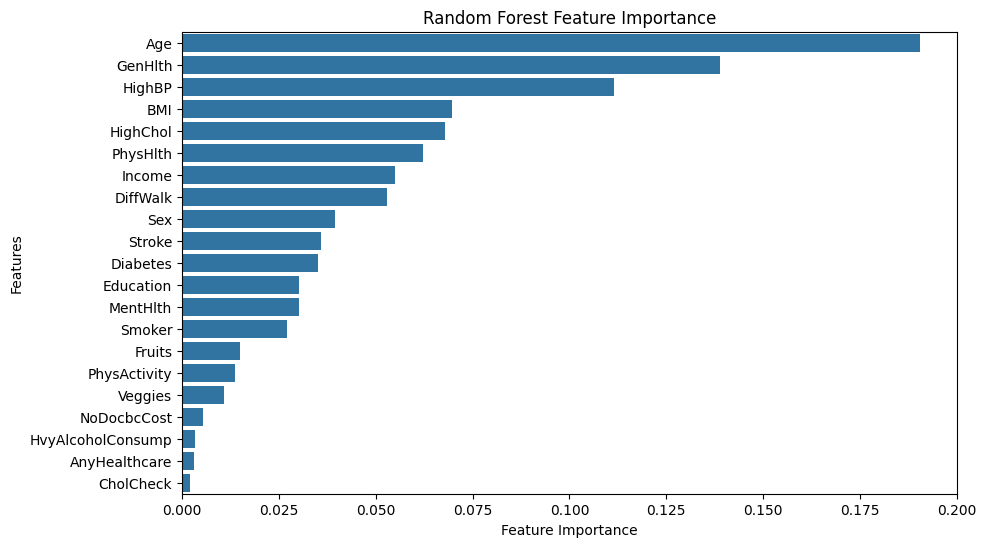

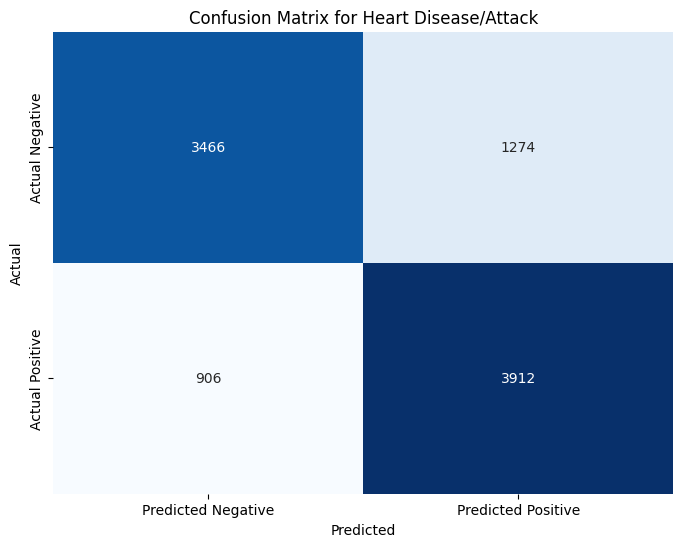

'\nfrom sklearn.metrics import roc_curve, roc_auc_score\n\nfrom sklearn.metrics import precision_recall_curve\ndf = df.dropna()\ndf = df.fillna(data.mean())  # Replace missing values with mean (for numeric columns)\ndf = df.dropna(axis=1)  # Drop columns with missing values\n\n#adjust the class weights to improve accuracy\n\n# Initialize the Random Forest classifier with class weights\n#for i in [25,50,75,100,125,150,175,200]:\n\nmodel1 = RandomForestClassifier(n_estimators=75, random_state=30)\n\n#, class_weight={0: weight_for_class_0, 1: weight_for_class_1}\n\n  #add nested for-loop for different hyperparameters\n  #record accuracy too\n\n  # Train the model on the training data\nmodel1.fit(X_train, y_train)\n\n  # Make predictions on the test data\ny_pred = model1.predict(X_test)\n\n  # Evaluate the model\'s performance\naccuracy = accuracy_score(y_test, y_pred)\nconfusion_mat = confusion_matrix(y_test, y_pred)\nclassification_rep = classification_report(y_test, y_pred)\n\n\n  # Pri

In [ ]:
# Initialize the Random Forest classifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'HeartAttackorDisease' is your target variable
X = undersampled_df.drop(columns=['HeartDiseaseorAttack'])
y = undersampled_df['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

#print out which hyperparameters were chosen from GridSearchCV

# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1
y_pred = best_rf_model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# Calculate and display confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)

# Feature Importance
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for labeling
confusion_df = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'],
                            index=['Actual Negative', 'Actual Positive'])

# Display the confusion matrix as a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Heart Disease/Attack')
plt.show()






In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = undersampled_df.drop(columns=['HeartDiseaseorAttack'])
y = undersampled_df['HeartDiseaseorAttack']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)




class BayesianNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(BayesianNet, self).__init()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)  # Output layer with 1 neuron for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        output = torch.sigmoid(self.fc2(x))
        return output

model = BayesianNet(input_dim=X_train.shape[1], hidden_dim=64)


criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()


with torch.no_grad():
    model.eval()
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Convert predicted probabilities to binary predictions (0 or 1)

# Calculate accuracy
correct = (y_pred == y_test).sum().item()
total = y_test.size(0)
accuracy = correct / total

print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

ValueError: could not determine the shape of object type 'Series'

In [ ]:




# Assuming you have already extracted feature importances into feature_importance
feature_importance = rf_model.feature_importances_

# Create a Pandas Series for feature importances
feature_importance_series = pd.Series(feature_importance, index=X.columns)
feature_importance_series = feature_importance_series.sort_values(ascending=False)

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis = 0)
fig,ax = plt.subplots(figsize=(8, 6))

feature_importance_series.plot.bar(yerr=std, ax = ax)
plt.xticks(rotation = 90, ha='right')

ax.set_title("Feature Importance (MDI)")
ax.set_ylabel('Mean Decrease in Impurity (MDI)')

fig.tight_layout()





